In [1]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate confusion matrix for the most confused classes
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
# read the json file
df = pd.read_json("../dataset/dbpedia/llm_graph_gpt3_l3.json")
df.head()

,text,l1,l2,l3,gpt3_graph_l1,gpt3_graph_l2,gpt3_graph_l3
0,Li Curt is a station on the Bernina Railway li...,Place,Station,RailwayStation,place,Station,RailwayStation
1,Grafton State Hospital was a psychiatric hospi...,Place,Building,Hospital,place,Building,Hospital
2,The Democratic Patriotic Alliance of Kurdistan...,Agent,Organisation,PoliticalParty,agent,Organisation,PoliticalParty
3,"Ira Rakatansky (October 3, 1919 – March 4, 201...",Agent,Person,Architect,agent,Person,Architect
4,Universitatea Reșița is a women handball club ...,Agent,SportsTeam,HandballTeam,agent,SportsTeam,HandballTeam


In [3]:
# change the l1	as small letter
df["l1"] = df["l1"].str.lower()
df["gpt3_graph_l1"] = df["gpt3_graph_l1"].str.lower()
# for each row, remove *, ', " from gpt3_graph_l1
df["gpt3_graph_l1"] = df["gpt3_graph_l1"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
# f1-macro
# if gpt3_graph_l1 is None, set it to a random label from l1
df["gpt3_graph_l1"] = df["gpt3_graph_l1"].fillna(df["l1"].sample(len(df)))
f1_l1 = f1_score(df["gpt3_graph_l1"], df["l1"], average="macro")
f1_l1

0.8837835419660213

                precision    recall  f1-score  support
device           0.339450  1.000000  0.506849     37.0
topicalconcept   0.630952  0.905983  0.743860    117.0
unitofwork       0.786145  0.992395  0.877311    263.0
sportsseason     0.907388  0.992036  0.947826    879.0
event            0.924934  0.980028  0.951684   2854.0
work             0.982410  0.960204  0.971180   3141.0
place            0.969275  0.975638  0.972446   6855.0
agent            0.994349  0.972006  0.983051  18647.0
species          0.999689  1.000000  0.999844   3210.0


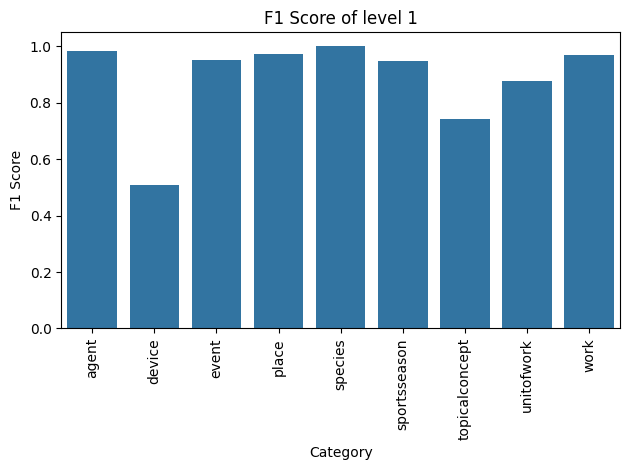

In [4]:
report = classification_report(df["l1"], df["gpt3_graph_l1"], output_dict=True)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure()
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90)
plt.title('F1 Score of level 1')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('level1_f1_scores.pdf')
plt.show()

In [ ]:
# change the l2	as small letter
df["l2"] = df["l2"].str.lower()
df["gpt3_graph_l2"] = df["gpt3_graph_l2"].str.lower()
# for each row, remove *, ', " from gpt3_graph_l2
df["gpt3_graph_l2"] = df["gpt3_graph_l2"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
# if gpt3_graph_l2 is not in l2, set it to a random label from l2
df["gpt3_graph_l2"] = df["gpt3_graph_l2"].apply(lambda x: x if x in df["l2"].values else df["l2"].sample(1).values[0])
f1_l2 = f1_score(df["gpt3_graph_l2"], df["l2"], average="macro")
acc_l2 = accuracy_score(df["gpt3_graph_l2"], df["l2"])
f1_l2, acc_l2

(0.7970084751397576, 0.8412076771380163)

                         precision    recall  f1-score  support
organisationmember        0.000000  0.000000  0.000000     57.0
footballleagueseason      0.013699  0.003497  0.005571    286.0
musicalartist             0.201342  1.000000  0.335196     30.0
britishroyalty            0.225080  0.958904  0.364583     73.0
song                      0.264339  1.000000  0.418146    106.0
...                            ...       ...       ...      ...
eukaryote                 0.947735  0.992701  0.969697    274.0
periodicalliterature      0.952703  0.990632  0.971297    854.0
engine                    0.948718  1.000000  0.973684     37.0
animal                    0.950976  0.998633  0.974222   2195.0
amusementparkattraction   0.986301  1.000000  0.993103     72.0

[70 rows x 4 columns]


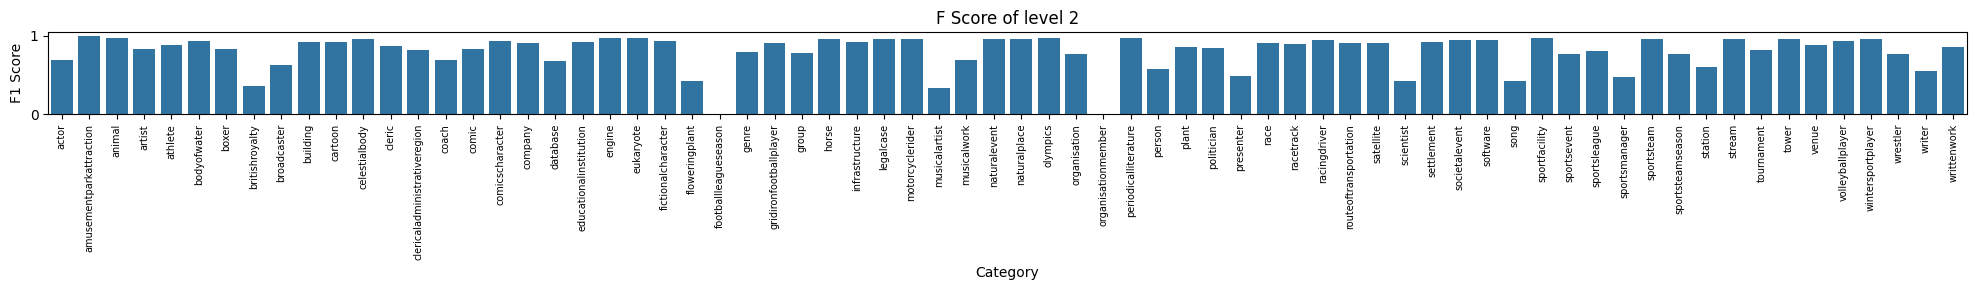

In [6]:

report = classification_report(df["l2"], df["gpt3_graph_l2"], output_dict=True, zero_division=0)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure(figsize=(20, 3))
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90, fontsize=7)
plt.title('F Score of level 2')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('level2_f1_scores.pdf')
plt.show()

In [ ]:
# change the l3	as small letter
df["l3"] = df["l3"].str.lower()
df["gpt3_graph_l3"] = df["gpt3_graph_l3"].str.lower()
# for each row, remove *, ', " from gpt3_graph_l3
df["gpt3_graph_l3"] = df["gpt3_graph_l3"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
# if gpt3_graph_l3 is not in l3, set it to a random label from l3
df["gpt3_graph_l3"] = df["gpt3_graph_l3"].apply(lambda x: x if x in df["l3"].values else df["l3"].sample(1).values[0])
f1_l3 = f1_score(df["gpt3_graph_l3"], df["l3"], average="macro")
acc_l3 = accuracy_score(df["gpt3_graph_l3"], df["l3"])
f1_l3, acc_l3

(0.894614196816801, 0.9073966058384023)

                                   precision    recall  f1-score  support
sportsteammember                    0.000000  0.000000  0.000000     57.0
officeholder                        0.326531  0.059259  0.100313    270.0
canadianfootballteam                0.178571  0.500000  0.263158     20.0
womenstennisassociationtournament   0.312500  0.288462  0.300000     52.0
religious                           0.221239  0.526316  0.311526     95.0
...                                      ...       ...       ...      ...
rollercoaster                       1.000000  1.000000  1.000000     72.0
netballplayer                       1.000000  1.000000  1.000000     25.0
crustacean                          1.000000  1.000000  1.000000    260.0
earthquake                          1.000000  1.000000  1.000000     79.0
squashplayer                        1.000000  1.000000  1.000000     40.0

[219 rows x 4 columns]


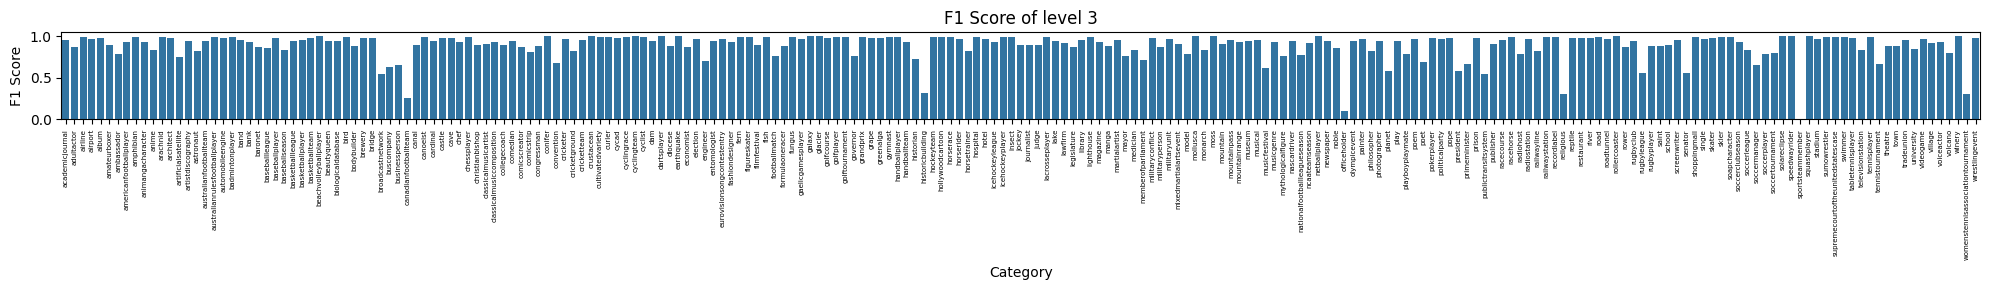

In [8]:
report = classification_report(df["l3"], df["gpt3_graph_l3"], output_dict=True, zero_division=0)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure(figsize=(20, 3))
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90, fontsize=5)
plt.title('F1 Score of level 3')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('level3_f1_scores.pdf')
plt.show()